# Pymaceutical - Research and Development

## Exploring the Efficacy of Capomulin

### --------------------------------------------------------------------------------------------------------------------------

### Preparing the Data

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# I chose a "left" join because I wanted to include all the rows from the "mouse_metadata" and only those that matched from the other
# There would be no value keeping data from "study_results" if I could not match it to data in the other csv (which provided key context data)

study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [139]:
# Change "Age_month" heading to be more uniform with the other column headings
study_data=study_data.rename(columns={"Age_months":"Age (Months)"})
study_data

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [140]:
# Identify column headings, missing data, data types (will help with upcoming tasks)
study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age (Months)        1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [141]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://stackoverflow.com/questions/39019591/duplicated-rows-when-merging-dataframes-in-python
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
# https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column 

duplicated_mice = study_data.loc[study_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(duplicated_mice)

['g989']


In [143]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = study_data[study_data["Mouse ID"].isin(duplicated_mice)==False]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [144]:
# Checking the number of mice in the clean DataFrame.
check_clean_mice=len(clean_mice["Mouse ID"].value_counts())
check_clean_mice

248

## Summary Statistics

In [145]:
# For EACH regimen, use groupby and summary statistical methods to calculate the tumor volume, including:
# 1)mean
regimen_mean = clean_mice.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# 2)median
regimen_median = clean_mice.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# 3)variance
regimen_variance = clean_mice.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# 4)standard deviation
regimen_stdev = clean_mice.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# 5)SEM
regimen_sem = clean_mice.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean": regimen_mean, 
                              "Median": regimen_mean,
                              "Variance":regimen_variance,
                              "Standard Deviation": regimen_stdev,
                              "Standard error of the Mean": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,Standard error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [147]:
# Using the aggregation method, produce the same summary statistics in a single line
# https://pbpython.com/groupby-agg.html
# https://datascienceparichay.com/article/pandas-groupby-median/
agg_table = clean_mice.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
agg_table

/var/folders/qk/h0rtvttx7pq7gh9m9g6zmlkry_033b/T/ipykernel_11180/200064911.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_table = clean_mice.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

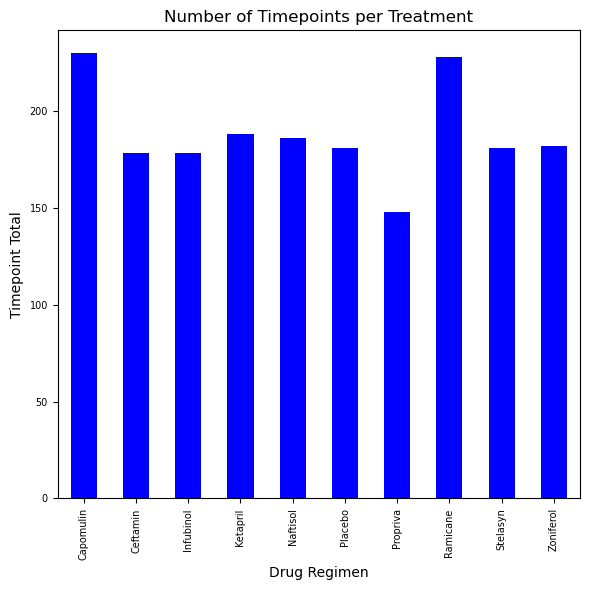

<Figure size 640x480 with 0 Axes>

In [148]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Grouping by Drug Regimen, count the number of timepoints in each regimen
regimen_timepoint = clean_mice.groupby(["Drug Regimen"]).count()["Timepoint"]

#Plot the results
regimen_timepoint.plot.bar(figsize=(6,6), color='b',fontsize = 7)

# Create labels to make the plot readable
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Timepoint Total",fontsize = 10)
plt.title("Number of Timepoints per Treatment",fontsize = 12)
plt.tight_layout()
plt.show()

#Save a copy of the plot in "images" file
plt.savefig("../Images/Pandas_timepoint_per_regimen.png", bbox_inches = "tight")

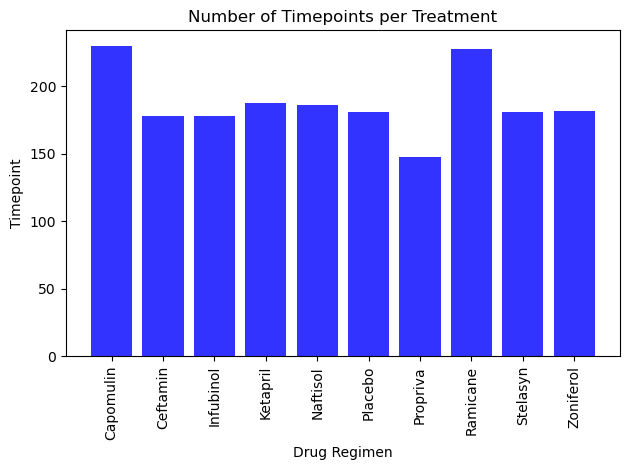

<Figure size 640x480 with 0 Axes>

In [149]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# First you need to count the number of timepoints (for each type of regimen)
timepoint_list = (clean_mice.groupby(["Drug Regimen"])["Timepoint"].count())

# timepoint_list    # (toggle on/off) to show the list of values held in the list

# Define the x-axis and tick locations
x_axis = np.arange(len(timepoint_list))
tick_xaxis = [value for value in x_axis]

# Plot the bar chart (adding in labels for x-axis)
plt.bar(x_axis, timepoint_list, color='b', alpha=0.8, align='center')

# Plot x-axis ticks
plt.xticks(tick_xaxis, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", 
                        "Ramicane", "Stelasyn", "Zoniferol"],  rotation="vertical")

plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Timepoint",fontsize = 10)
plt.title("Number of Timepoints per Treatment",fontsize = 12)
plt.tight_layout()
plt.show()

# Save an image of the plot in the "images" folder
plt.savefig("../Images/Pyplot_timepoint_per_regimen.png", bbox_inches = "tight")

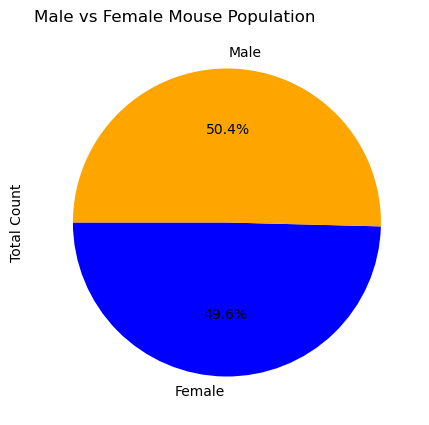

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (non-duplicated/clean data set)

# Group by gender (male & female) and save the number to plot in a dataframe
groupby_gender = clean_mice.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
gender_count = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Total Count"]

# As pie plots are representative of a percentage of a population, need to calculate percentage for each gender
gender_count["Percentage of Sex"] = (100*(gender_count["Total Count"]/gender_count["Total Count"].sum()))

# Plot the results using a pie chart
colors = ["blue", "orange"]
plot = gender_count.plot.pie(y="Total Count",figsize=(8,5), colors = colors, startangle=180, autopct="%1.1f%%", legend = False)

plt.title("Male vs Female Mouse Population",fontsize = 12, loc="left")

plt.savefig("../Images/pie_pandas.png", bbox_inches = "tight")
plt.show()

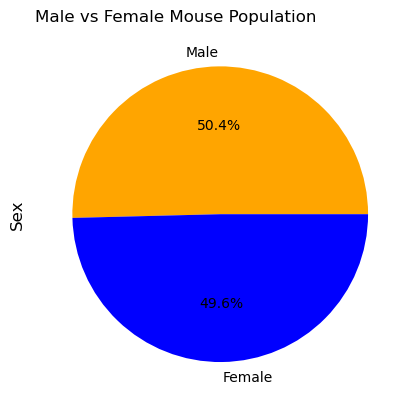

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot (non-duplicated/clean data set)

# Create Labels for the sections of the pie
labels = ["Male","Female"]

#Define a list the percentages of each gender
sizes = [50.4,49.6]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Create the pie chart based upon the values 
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.title("Male vs Female Mouse Population",fontsize = 12, loc="left")
plt.ylabel("Sex",fontsize = 12)

plt.savefig("../Images/pyplot_plot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Find the final tumour volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate quartiles & IQR. 
# Quantitatively determine if there are potential outliers across all four treatment regimens.

# Step 1: create a grouped DataFrame that shows the last (greatest) timepoint for each mouse. (www.geeksforgeeks.org/python-pandas-series-last)
last_tp = clean_mice.groupby(["Mouse ID"])["Timepoint"].max() 
last_tp = last_tp.reset_index()
#last_vol # toggle on/off to verify results

# Step 2: Merge the grouped DataFrame with the original clean DataFrame.
last_merged = last_tp.merge(clean_mice, on=("Mouse ID", "Timepoint"), how="left")
#last_merged.head() # toggle on/off to verify results

# Step 3: Create 2 lists: 1) treatment & 2) blank list to append the final tumour volume for each drug regimen.
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volume_list = []

# Step 4: Loop through each drug in the treatment list. 
# Locate the rows in the merged Dataframe that correspond to each treatment.  
# Append the resulting final tumour volumes for each drug to the empty list.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = last_merged.loc[last_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"] 

    # Append the final tumour volumes the empty list that was created
    final_volume_list.append(final_volume)

    # Determine outliers by using the upper and lower bounds
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    median = quartiles [0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]

    # Print the results
    print(f"{drug}")
    print(f"The lower quartile of tumour volume is: {lowerq}")
    print(f"The upper quartile of tumour volume is: {upperq}")
    print(f"The interquartile range of tumour volume is: {iqr}")
    print(f"The median of tumour volume is: {median}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"{drug}s potential outliers: {outliers}")
    print("--------------------------------------------------------------------------------------")

Capomulin
The lower quartile of tumour volume is: 32.37735684
The upper quartile of tumour volume is: 40.1592203
The interquartile range of tumour volume is: 7.781863460000004
The median of tumour volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------------------------------
Ramicane
The lower quartile of tumour volume is: 31.56046955
The upper quartile of tumour volume is: 40.65900627
The interquartile range of tumour volume is: 9.098536719999998
The median of tumour volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------------------------------
Infubinol
The lower quartile of

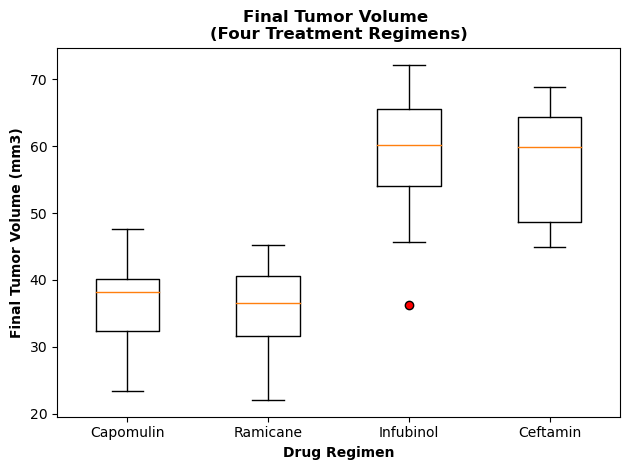

In [153]:
# Using Matplotlib, generate a box plot of the final tumour volume for all four treatment regimens.  Highlight any potential outliers in the lot by changing their colour and style.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume \n(Four Treatment Regimens)", fontweight="bold")
ax1.set_xlabel("Drug Regimen", fontweight="bold")
ax1.set_ylabel("Final Tumor Volume (mm3)", fontweight="bold")
ax1.boxplot(final_volume_list, flierprops=dict(markerfacecolor='r'))
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig("../Images/final_tumor_boxplot.png")

plt.show()


## Line and Scatter Plots

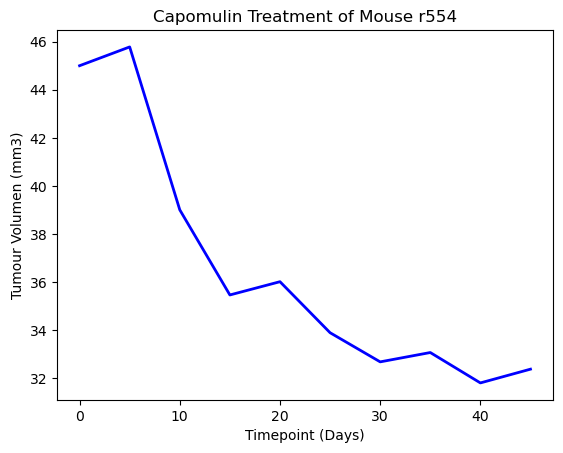

In [154]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Generate dataframe for Capomulin Regimen
capo_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin"]

# Identify a mouse treated with Capomulin
mouse_id = "r554"
mouse_lineplt = capo_df.loc[capo_lineplt['Mouse ID'] == mouse_id]

# Generate line plot
plt.plot(mouse_lineplt["Timepoint"], mouse_lineplt["Tumor Volume (mm3)"], linewidth=2, color="blue")

# Add labels to the x and y axes
plt.title("Capomulin Treatment of Mouse r554")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumour Volumen (mm3)")


# Save the plot and display it
plt.savefig("../Images/mouse_lineplt.png")

plt.show()

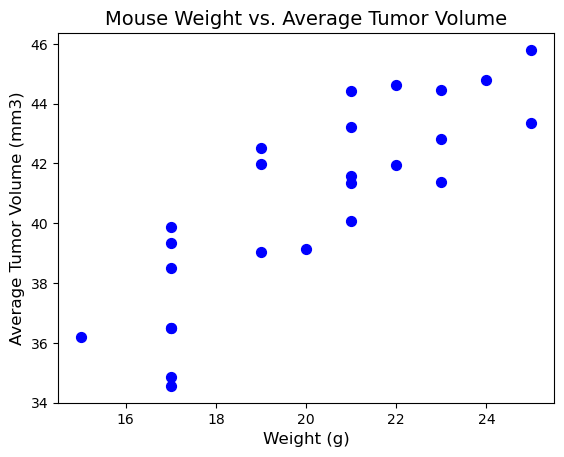

In [155]:
# Generate a scatter plot of average tumoor volume vs. mouse weight for the Capomulin regimen

# Calculate average tumour volume
avg_tumour_vol = capo_df.groupby(['Mouse ID']).mean()

# Plot the scattergram
plt.scatter(avg_tumour_vol['Weight (g)'],avg_tumour_vol['Tumor Volume (mm3)'],s=50, color="blue")

plt.title("Mouse Weight vs. Average Tumor Volume", fontsize =14)
plt.xlabel("Weight (g)", fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize =12)

# Save the plot and display it
plt.savefig("../Images/weight_vs_tumour_scattergram.png")
plt.show()

## Correlation and Regression

The correlation between weight and tumor is: 0.84


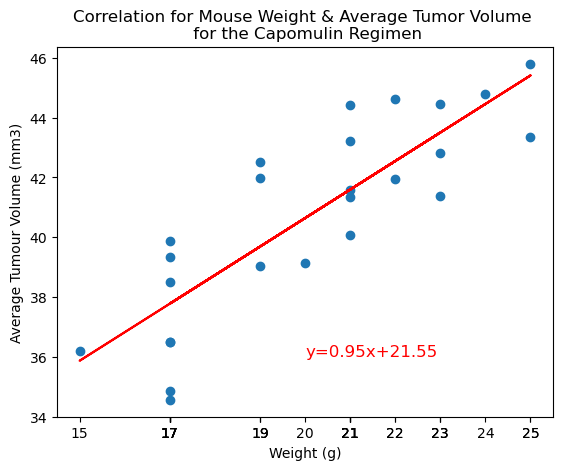

In [160]:
# Calculate the correlation coefficient 
# & linear regression model for mouse weight & average tumor volume for Capomulin 

mouse_weight = capo_df.groupby("Mouse ID")

# x-axis
capo_weight_mean = (mouse_weight["Weight (g)"]).mean()

# y-vale
capo_tumor_mean = (mouse_weight["Tumor Volume (mm3)"]).mean()

# Perform a linear regression on weight versus average tumor volume
(slope,intercept, rvalue, pvalue, stderr) = linregress(capo_weight_mean, capo_tumor_mean)
regress_values = capo_weight_mean * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(capo_weight_mean,capo_tumor_mean)[0],2)
print(f'The correlation between weight and tumor is: {correlation}')

# plt.plot(x_values, y_values)
plt.scatter(capo_weight_mean, capo_tumor_mean)
plt.annotate(line_eq,(0, 0), fontsize=15, color="red")
plt.title("Correlation for Mouse Weight & Average Tumor Volume \n for the Capomulin Regimen")
plt.ylabel("Average Tumour Volume (mm3)")
plt.xlabel("Weight (g)")

plt.plot(capo_weight_mean,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.xticks(capo_weight_mean)

# Save the plot and display it
plt.savefig("../Images/weight_vs_tumour_linregress.png")
plt.show()